In [33]:
import numpy as np
import pandas as pd
import matplotlib as plt



In [34]:
data1 = pd.read_csv("airdata/dwarka-2017.csv",sep=';')
#size = len(data1)
print(data1.head(10))
#import csv
#r = []
'''with open("airdata/dwarka.csv", 'r') as data_file:
    #data_file.readline() # Skip first line
    reader = csv.reader(data_file)
    

    for row in reader:
        r.append('"{}"'.format(row[0]))
        
        print('"{}"'.format(row[0]))  
    with open('airdata/dwarka-2017.csv', 'a') as result:
            writer = csv.writer(result, dialect='excel')
            for i in r:
                print(i)
                writer.writerow([i])'''
            
#for name, age, gender, height in reader:
#   print name + ',' + age + ',' + gender + ',' + height
#print(data1['index'])
#data = pd.read_csv("airdata/dwarka-2015.csv",sep=';')
#data['Nitrogen Dioxide(NO2)']


#print(data.head(1))

         index  Nitrogen Dioxide(NO2) PM 2.5(PM2.5)  Solar Radiation(SR)  \
0   01/02/2017                  27.88        137.15               204.51   
1   01/03/2017                  43.61        122.76               184.22   
2   01/04/2017                  27.70           NaN               195.54   
3   01/05/2017                  29.19        104.63               266.06   
4   01/06/2017                  32.03         98.50               184.36   
5   01/07/2017                  32.28         48.93               209.66   
6   01/08/2017                   9.19         38.86                71.46   
7   01/09/2017                  23.59         45.75               131.51   
8   01/10/2017                  43.40        100.89                99.49   
9   01/11/2017                  49.27        173.11                63.48   

   Temperature(TEMP)  Sulfur Dioxide(SO2)  
0              16.81                 5.33  
1              26.93                12.99  
2              34.58           

'with open("airdata/dwarka.csv", \'r\') as data_file:\n    #data_file.readline() # Skip first line\n    reader = csv.reader(data_file)\n    \n\n    for row in reader:\n        r.append(\'"{}"\'.format(row[0]))\n        \n        print(\'"{}"\'.format(row[0]))  \n    with open(\'airdata/dwarka-2017.csv\', \'a\') as result:\n            writer = csv.writer(result, dialect=\'excel\')\n            for i in r:\n                print(i)\n                writer.writerow([i])'

In [35]:
arr = ['index.1', 'Nitrogen Dioxide(NO2).1', 'Bar Pressure(Bar Pressure).1',
       'PM 10(RSPM).1', 'PM 2.5(PM2.5).1', 'Sulfur Dioxide(SO2).1',
       'Temperature(TEMP).1']
for i in range(2010,2017):
    data = pd.read_csv("airdata/dwarka-"+str(i)+".csv",sep=';')
    for col in data.columns:
        #print("col:",col)
        if col in arr:
            print(col)
            del data[col]
    #print(data.columns)
    
    with open("airdata/dwarka-"+str(i)+".csv", 'w') as fw:
        data.to_csv(fw, sep=';', encoding='utf-8', index=False)
       

In [36]:
files = ["airdata/dwarka-"+str(i)+".csv" for i in range(2010,2018)]
dfs = [pd.read_csv(fp, sep=';', parse_dates=[0], decimal=',') for fp in files]
df = pd.concat(dfs).drop_duplicates().reset_index(drop=True)
print (df)


     Bar Pressure(Bar Pressure) Nitrogen Dioxide(NO2) PM 10(RSPM)  \
0                        646.09                  12.3      124.12   
1                        732.95                 27.28       70.62   
2                        735.69                 29.57      109.88   
3                        734.58                 15.93       61.12   
4                        729.43                 45.35      163.67   
5                        727.86                 42.95       218.0   
6                        729.86                 32.12       42.12   
7                        730.87                 30.26       76.11   
8                        732.62                 44.11      125.72   
9                        738.13                 90.69      418.28   
10                       737.55                 76.57      249.77   
11                       646.85                  7.45      110.46   
12                       732.92                  1.78       75.11   
13                       734.41   

In [37]:
s = (df['index'].apply(lambda x: x.split('\xa0')))
s = s.apply(lambda x: x[1])
df['index'] = s

In [38]:
with open('airdata/combined.csv', 'w') as fw:
    df.to_csv(fw, sep=';', encoding='utf-8', index=False)

In [39]:
data = pd.read_csv("airdata/combined.csv",sep=';')
data = pd.DataFrame(data)
#data.set_index('index', drop=True)
data

,Bar Pressure(Bar Pressure),Nitrogen Dioxide(NO2),PM 10(RSPM),PM 2.5(PM2.5),Solar Radiation(SR),Sulfur Dioxide(SO2),Temperature(TEMP),index
0,646.09,12.30,124.12,NaN,NaN,5.85,14.61,01/02/2010
1,732.95,27.28,70.62,NaN,NaN,5.05,23.87,01/03/2010
2,735.69,29.57,109.88,NaN,NaN,23.84,31.54,01/04/2010
3,734.58,15.93,61.12,NaN,NaN,6.36,30.12,01/05/2010
4,729.43,45.35,163.67,NaN,NaN,4.42,34.22,01/06/2010
5,727.86,42.95,218.00,NaN,NaN,8.59,NaN,01/07/2010
6,729.86,32.12,42.12,NaN,NaN,NaN,26.58,01/08/2010
7,730.87,30.26,76.11,NaN,NaN,4.90,28.84,01/09/2010
8,732.62,44.11,125.72,NaN,NaN,NaN,26.08,01/10/2010
9,738.13,90.69,418.28,NaN,NaN,3.48,21.67,01/11/2010


In [40]:
data['index'] = pd.to_datetime(data['index'], format='%d/%m/%Y')

In [41]:
data.rename(columns={'Nitrogen Dioxide(NO2)': 'NO2', 'Bar Pressure(Bar Pressure)': 'Bar_Pressure','PM 10(RSPM)': 'PM10','Temperature(TEMP)': 'Temp','Sulfur Dioxide(SO2)': 'SO2','PM 2.5(PM2.5)':'PM2.5','Solar_Radiation(SR)':'Solar_Radiation'}, inplace=True)
data.index = data['index']
del data['index']
data.describe()
data

,Bar_Pressure,NO2,PM10,PM2.5,Solar Radiation(SR),SO2,Temp
index,,,,,,,
2010-02-01,646.09,12.30,124.12,NaN,NaN,5.85,14.61
2010-03-01,732.95,27.28,70.62,NaN,NaN,5.05,23.87
2010-04-01,735.69,29.57,109.88,NaN,NaN,23.84,31.54
2010-05-01,734.58,15.93,61.12,NaN,NaN,6.36,30.12
2010-06-01,729.43,45.35,163.67,NaN,NaN,4.42,34.22
2010-07-01,727.86,42.95,218.00,NaN,NaN,8.59,NaN
2010-08-01,729.86,32.12,42.12,NaN,NaN,NaN,26.58
2010-09-01,730.87,30.26,76.11,NaN,NaN,4.90,28.84
2010-10-01,732.62,44.11,125.72,NaN,NaN,NaN,26.08


In [42]:
idx = pd.date_range(data.index.min(), data.index.max())
s = data.reindex(idx)
data = s
data

,Bar_Pressure,NO2,PM10,PM2.5,Solar Radiation(SR),SO2,Temp
2010-01-04,650.28,3.26,48.95,NaN,NaN,1.74,10.65
2010-01-05,648.86,5.30,57.12,NaN,NaN,1.99,10.74
2010-01-06,645.97,10.39,113.11,NaN,NaN,4.18,11.21
2010-01-07,646.22,8.55,124.22,NaN,NaN,5.20,10.78
2010-01-08,647.40,4.23,66.37,NaN,NaN,2.66,9.04
2010-01-09,648.90,1.21,51.65,NaN,NaN,1.42,10.55
2010-01-10,647.32,2.29,53.37,NaN,NaN,1.14,7.64
2010-01-11,647.28,2.26,58.41,NaN,NaN,NaN,7.85
2010-01-12,646.94,8.62,105.51,NaN,NaN,1.60,8.29
2010-01-13,647.35,10.17,137.98,NaN,NaN,5.72,10.03


In [43]:
data.index = pd.to_datetime(data.index, format='%Y-%m-%d')
data.index.dtype
data.sort_index(inplace = True)
print(data.index)

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-09', '2010-01-10', '2010-01-11',
               '2010-01-12', '2010-01-13',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', length=2919, freq='D')


In [44]:
data = data.interpolate(method='linear', axis=0).ffill().bfill()


In [45]:
data.describe()

,Bar_Pressure,NO2,PM10,Solar Radiation(SR),SO2,Temp
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,746.965142,40.432900,129.518326,523.391672,9.449102,25.278051
std,19.936393,29.883281,112.296208,181.843901,8.453879,8.435027
min,370.010000,1.210000,0.020000,1.500000,1.010000,0.010000
25%,739.595000,21.876667,28.770000,610.440000,4.410000,19.150000
50%,750.650000,34.190000,105.460000,610.440000,7.150000,26.890000
75%,757.675000,48.070000,190.850000,610.440000,11.400000,31.140000
max,766.390000,334.070000,783.270000,789.170000,122.640000,67.500000


In [46]:
data

,Bar_Pressure,NO2,PM10,PM2.5,Solar Radiation(SR),SO2,Temp
2010-01-04,650.28,3.26,48.95,82.51,610.44,1.74,10.65
2010-01-05,648.86,5.30,57.12,82.51,610.44,1.99,10.74
2010-01-06,645.97,10.39,113.11,82.51,610.44,4.18,11.21
2010-01-07,646.22,8.55,124.22,82.51,610.44,5.20,10.78
2010-01-08,647.40,4.23,66.37,82.51,610.44,2.66,9.04
2010-01-09,648.90,1.21,51.65,82.51,610.44,1.42,10.55
2010-01-10,647.32,2.29,53.37,82.51,610.44,1.14,7.64
2010-01-11,647.28,2.26,58.41,82.51,610.44,1.37,7.85
2010-01-12,646.94,8.62,105.51,82.51,610.44,1.60,8.29
2010-01-13,647.35,10.17,137.98,82.51,610.44,5.72,10.03


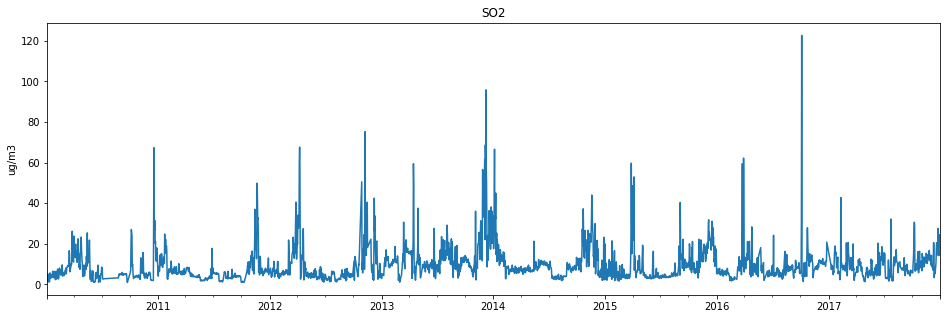

In [47]:
import matplotlib.pyplot as plt 

#area1 = data.loc[data['Location of Monitoring Station'] == 'Nizamuddin, Delhi']
data1 = data["SO2"]
data1.plot(figsize=(16,5)) 
plt.title("SO2")
plt.ylabel("ug/m3")

plt.show()

In [48]:
df = data

In [49]:
df.index

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-09', '2010-01-10', '2010-01-11',
               '2010-01-12', '2010-01-13',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', length=2919, freq='D')

In [50]:
df

,Bar_Pressure,NO2,PM10,PM2.5,Solar Radiation(SR),SO2,Temp
2010-01-04,650.28,3.26,48.95,82.51,610.44,1.74,10.65
2010-01-05,648.86,5.30,57.12,82.51,610.44,1.99,10.74
2010-01-06,645.97,10.39,113.11,82.51,610.44,4.18,11.21
2010-01-07,646.22,8.55,124.22,82.51,610.44,5.20,10.78
2010-01-08,647.40,4.23,66.37,82.51,610.44,2.66,9.04
2010-01-09,648.90,1.21,51.65,82.51,610.44,1.42,10.55
2010-01-10,647.32,2.29,53.37,82.51,610.44,1.14,7.64
2010-01-11,647.28,2.26,58.41,82.51,610.44,1.37,7.85
2010-01-12,646.94,8.62,105.51,82.51,610.44,1.60,8.29
2010-01-13,647.35,10.17,137.98,82.51,610.44,5.72,10.03


In [51]:
#df.reset_index(inplace=True)
df['Date'] = pd.to_datetime(df.index)
#df = df.set_index('index')

In [52]:
data.index = pd.to_datetime(data.index, format='%Y-%m-%d')
data.index.dtype

dtype('<M8[ns]')

In [53]:
df.describe()

,Bar_Pressure,NO2,PM10,Solar Radiation(SR),SO2,Temp
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,746.965142,40.432900,129.518326,523.391672,9.449102,25.278051
std,19.936393,29.883281,112.296208,181.843901,8.453879,8.435027
min,370.010000,1.210000,0.020000,1.500000,1.010000,0.010000
25%,739.595000,21.876667,28.770000,610.440000,4.410000,19.150000
50%,750.650000,34.190000,105.460000,610.440000,7.150000,26.890000
75%,757.675000,48.070000,190.850000,610.440000,11.400000,31.140000
max,766.390000,334.070000,783.270000,789.170000,122.640000,67.500000


In [54]:
data.describe()

,Bar_Pressure,NO2,PM10,Solar Radiation(SR),SO2,Temp
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,746.965142,40.432900,129.518326,523.391672,9.449102,25.278051
std,19.936393,29.883281,112.296208,181.843901,8.453879,8.435027
min,370.010000,1.210000,0.020000,1.500000,1.010000,0.010000
25%,739.595000,21.876667,28.770000,610.440000,4.410000,19.150000
50%,750.650000,34.190000,105.460000,610.440000,7.150000,26.890000
75%,757.675000,48.070000,190.850000,610.440000,11.400000,31.140000
max,766.390000,334.070000,783.270000,789.170000,122.640000,67.500000


In [55]:
df.describe()

,Bar_Pressure,NO2,PM10,Solar Radiation(SR),SO2,Temp
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,746.965142,40.432900,129.518326,523.391672,9.449102,25.278051
std,19.936393,29.883281,112.296208,181.843901,8.453879,8.435027
min,370.010000,1.210000,0.020000,1.500000,1.010000,0.010000
25%,739.595000,21.876667,28.770000,610.440000,4.410000,19.150000
50%,750.650000,34.190000,105.460000,610.440000,7.150000,26.890000
75%,757.675000,48.070000,190.850000,610.440000,11.400000,31.140000
max,766.390000,334.070000,783.270000,789.170000,122.640000,67.500000


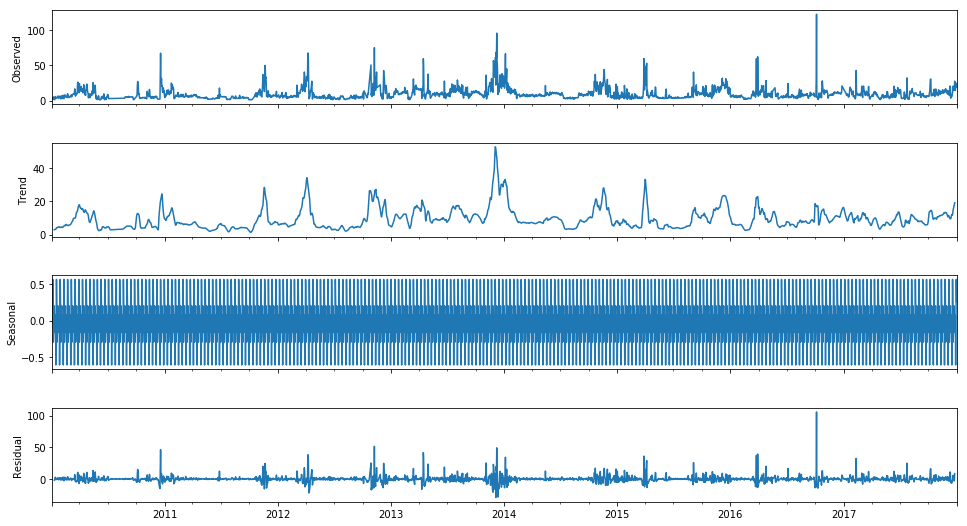

In [56]:
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data.SO2, freq=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

In [57]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

/home/ninjakx/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
/home/ninjakx/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


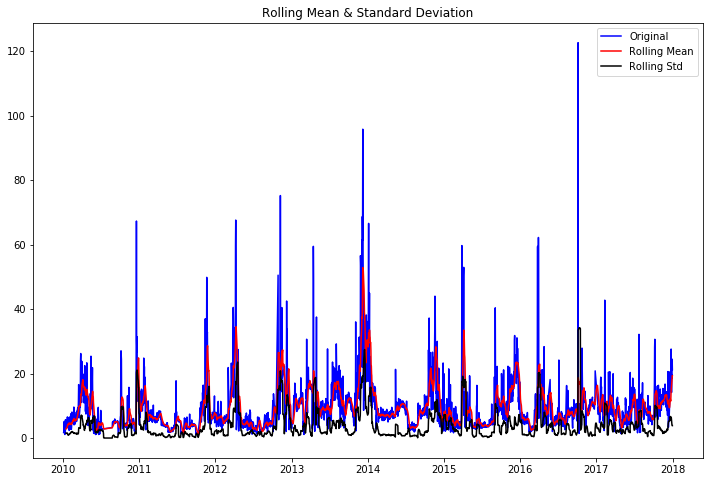

Results of Dickey-Fuller Test:
Test Statistic                -6.460433e+00
p-value                        1.447798e-08
#Lags Used                     1.700000e+01
Number of Observations Used    2.901000e+03
Critical Value (1%)           -3.432606e+00
Critical Value (5%)           -2.862537e+00
Critical Value (10%)          -2.567301e+00
dtype: float64


In [58]:
test_stationarity(data.SO2)

/home/ninjakx/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
/home/ninjakx/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


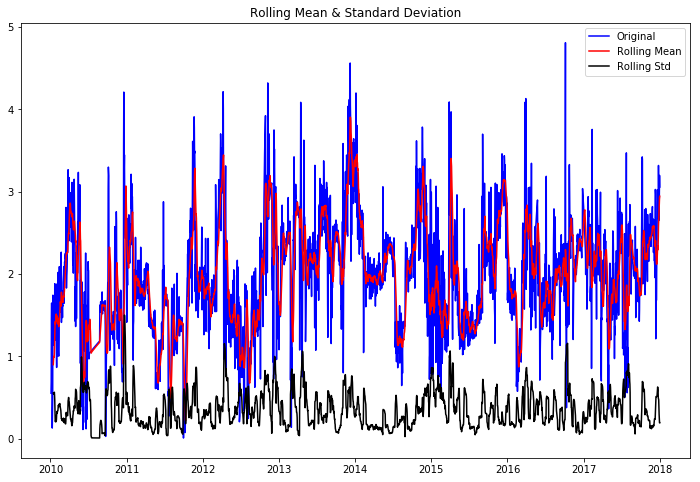

Results of Dickey-Fuller Test:
Test Statistic                -6.204272e+00
p-value                        5.707987e-08
#Lags Used                     1.600000e+01
Number of Observations Used    2.902000e+03
Critical Value (1%)           -3.432605e+00
Critical Value (5%)           -2.862536e+00
Critical Value (10%)          -2.567300e+00
dtype: float64


In [59]:
data.SO2_log= data.SO2.apply(lambda x: np.log(x))  
test_stationarity(data.SO2_log)

/home/ninjakx/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
/home/ninjakx/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


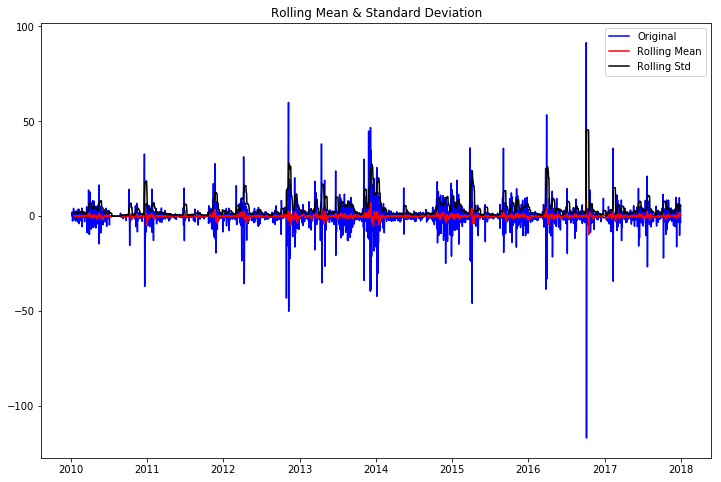

Results of Dickey-Fuller Test:
Test Statistic                  -19.426857
p-value                           0.000000
#Lags Used                       16.000000
Number of Observations Used    2901.000000
Critical Value (1%)              -3.432606
Critical Value (5%)              -2.862537
Critical Value (10%)             -2.567301
dtype: float64


In [60]:
data['first_difference'] = data.SO2 - data.SO2.shift(1)  
test_stationarity(data.first_difference.dropna(inplace=False))

/home/ninjakx/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
/home/ninjakx/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


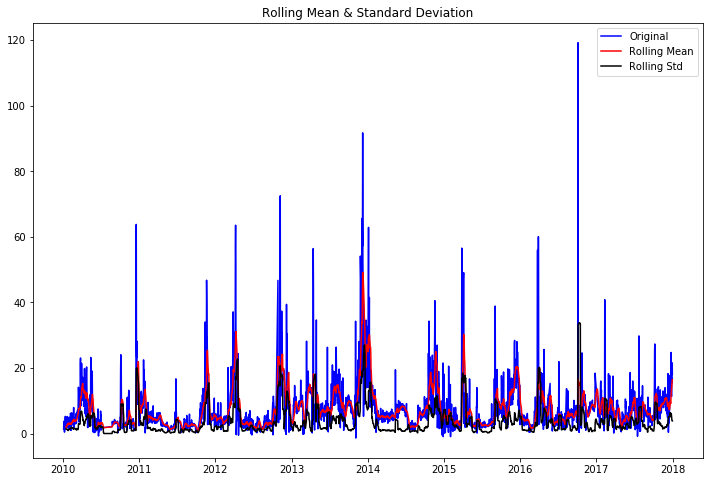

Results of Dickey-Fuller Test:
Test Statistic                -8.034037e+00
p-value                        1.924026e-12
#Lags Used                     1.000000e+01
Number of Observations Used    2.907000e+03
Critical Value (1%)           -3.432601e+00
Critical Value (5%)           -2.862535e+00
Critical Value (10%)          -2.567300e+00
dtype: float64


In [61]:
data['log_first_difference'] = data.SO2 - data.SO2_log.shift(1)  
test_stationarity(data.log_first_difference.dropna(inplace=False))

/home/ninjakx/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
/home/ninjakx/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


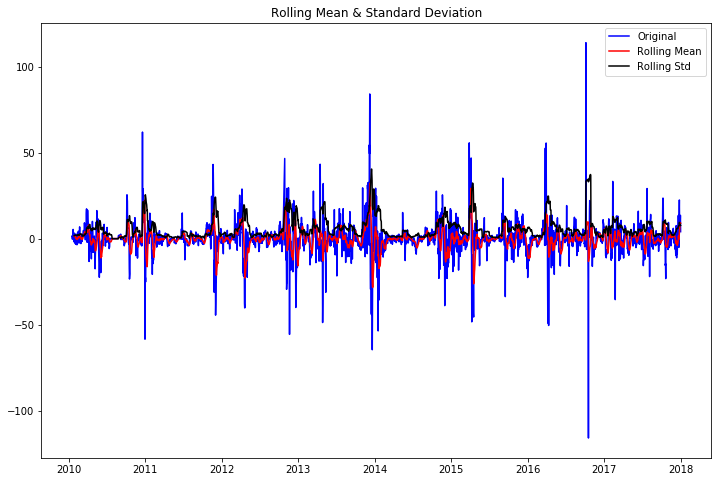

Results of Dickey-Fuller Test:
Test Statistic                -9.987356e+00
p-value                        2.038740e-17
#Lags Used                     2.700000e+01
Number of Observations Used    2.879000e+03
Critical Value (1%)           -3.432623e+00
Critical Value (5%)           -2.862544e+00
Critical Value (10%)          -2.567305e+00
dtype: float64


In [62]:
data['seasonal_difference'] = data.SO2 - data.SO2.shift(12)  
test_stationarity(data.seasonal_difference.dropna(inplace=False))

/home/ninjakx/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
/home/ninjakx/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


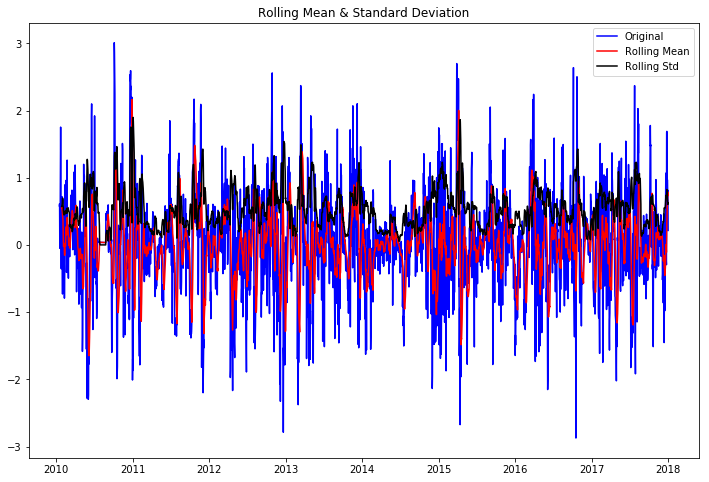

Results of Dickey-Fuller Test:
Test Statistic                -9.515990e+00
p-value                        3.156233e-16
#Lags Used                     2.800000e+01
Number of Observations Used    2.878000e+03
Critical Value (1%)           -3.432624e+00
Critical Value (5%)           -2.862545e+00
Critical Value (10%)          -2.567305e+00
dtype: float64


In [63]:
data['log_seasonal_difference'] = data.SO2_log - data.SO2_log.shift(12)  
test_stationarity(data.log_seasonal_difference.dropna(inplace=False))

/home/ninjakx/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
/home/ninjakx/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


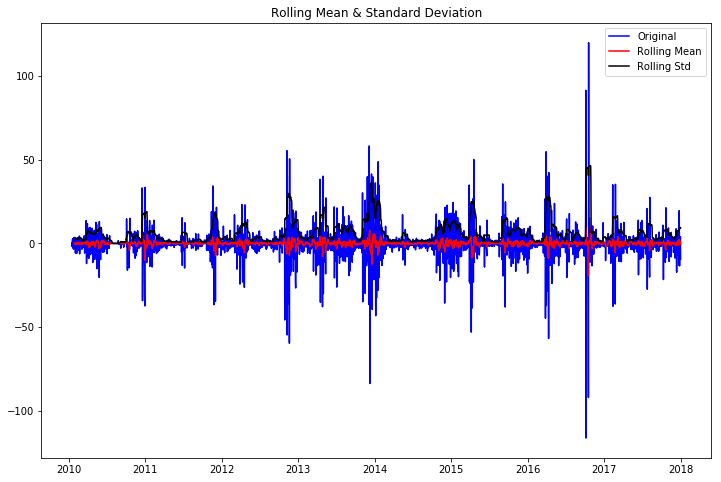

Results of Dickey-Fuller Test:
Test Statistic                  -19.375326
p-value                           0.000000
#Lags Used                       28.000000
Number of Observations Used    2877.000000
Critical Value (1%)              -3.432625
Critical Value (5%)              -2.862545
Critical Value (10%)             -2.567305
dtype: float64


In [64]:
data['seasonal_first_difference'] = data.first_difference - data.first_difference.shift(12)  
test_stationarity(data.seasonal_first_difference.dropna(inplace=False))

/home/ninjakx/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
/home/ninjakx/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


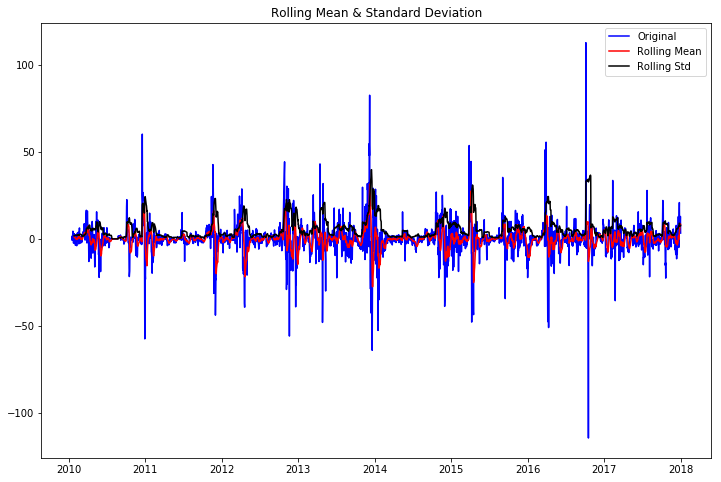

Results of Dickey-Fuller Test:
Test Statistic                -9.667072e+00
p-value                        1.306575e-16
#Lags Used                     2.800000e+01
Number of Observations Used    2.877000e+03
Critical Value (1%)           -3.432625e+00
Critical Value (5%)           -2.862545e+00
Critical Value (10%)          -2.567305e+00
dtype: float64


In [65]:
data['log_seasonal_first_difference'] = data.log_first_difference - data.log_first_difference.shift(12)  
test_stationarity(data.log_seasonal_first_difference.dropna(inplace=False))

In [80]:
ts_log = np.log(data.SO2)
ts_log_diff = ts_log - ts_log.shift()



Text(0.5,1,'RSS (Root Squared Sum): nan')

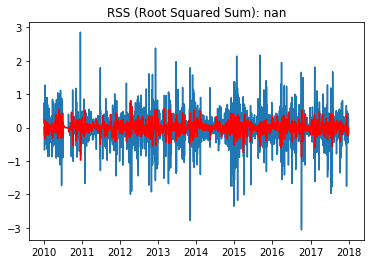

In [81]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS (Root Squared Sum): %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

In [82]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff.head()

2010-01-05    0.000677
2010-01-06   -0.026509
2010-01-07   -0.200910
2010-01-08   -0.228885
2010-01-09    0.000649
Freq: D, dtype: float64

In [83]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

2010-01-05    0.000677
2010-01-06   -0.025832
2010-01-07   -0.226742
2010-01-08   -0.455627
2010-01-09   -0.454978
Freq: D, dtype: float64

In [84]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()

/home/ninjakx/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


2010-01-04    0.553885
2010-01-05    0.554562
2010-01-06    0.528053
2010-01-07    0.327143
2010-01-08    0.098258
Freq: D, dtype: float64

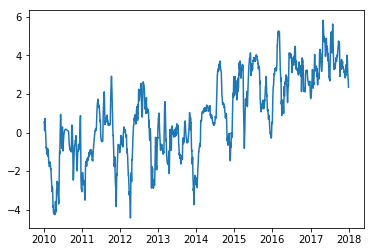

In [86]:
plt.plot(predictions_ARIMA_log)

Text(0.5,1,'RMSE: 33.1752')

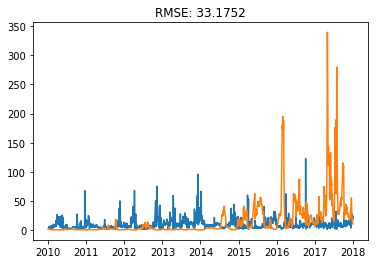

In [90]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(data.SO2)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-data.SO2)**2)/len(data.SO2)))

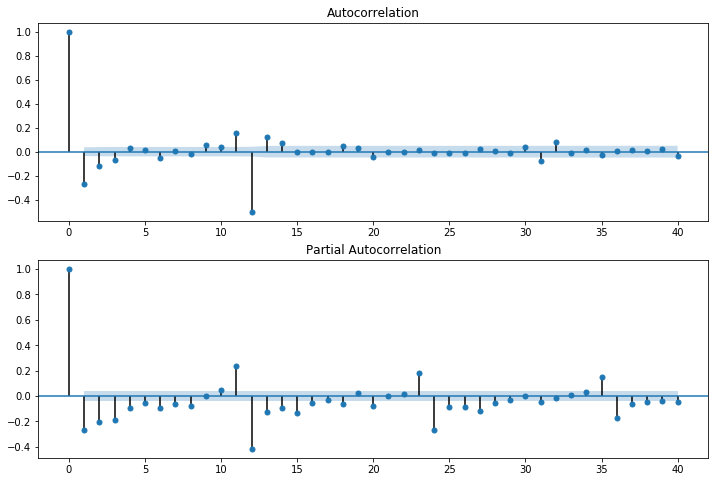

In [66]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data.seasonal_first_difference.iloc[13:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data.seasonal_first_difference.iloc[13:], lags=40, ax=ax2)

In [67]:
mod = sm.tsa.statespace.SARIMAX(data.SO2, trend='n', order=(0,1,0), seasonal_order=(0,1,1,12))
results = mod.fit()
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                SO2   No. Observations:                 2919
Model:             SARIMAX(0, 1, 0)x(0, 1, 1, 12)   Log Likelihood               -9551.711
Date:                            Sun, 11 Feb 2018   AIC                          19107.423
Time:                                    10:10:22   BIC                          19119.381
Sample:                                01-04-2010   HQIC                         19111.730
                                     - 12-31-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -0.9956      0.009   -109.185      0.000      -1.013      -0.978
sigma2        41.1364      0.248   

In [68]:
mod = sm.tsa.statespace.SARIMAX(data.SO2, trend='n', order=(0,1,0), seasonal_order=(1,1,1,12))
results = mod.fit()
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                SO2   No. Observations:                 2919
Model:             SARIMAX(0, 1, 0)x(1, 1, 1, 12)   Log Likelihood               -9550.889
Date:                            Sun, 11 Feb 2018   AIC                          19107.777
Time:                                    10:15:55   BIC                          19125.714
Sample:                                01-04-2010   HQIC                         19114.238
                                     - 12-31-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0240      0.015     -1.580      0.114      -0.054       0.006
ma.S.L12      -0.9944      0.008   

In [69]:
len(data)
data2=data

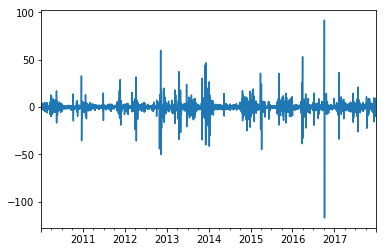

In [70]:
results.resid.plot()

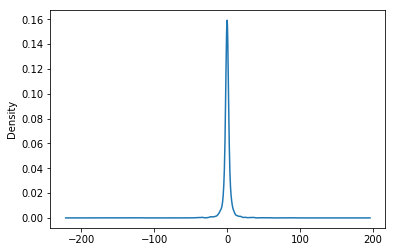

In [71]:
results.resid.plot(kind='kde')


In [72]:
data.index 

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-09', '2010-01-10', '2010-01-11',
               '2010-01-12', '2010-01-13',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', length=2919, freq='D')

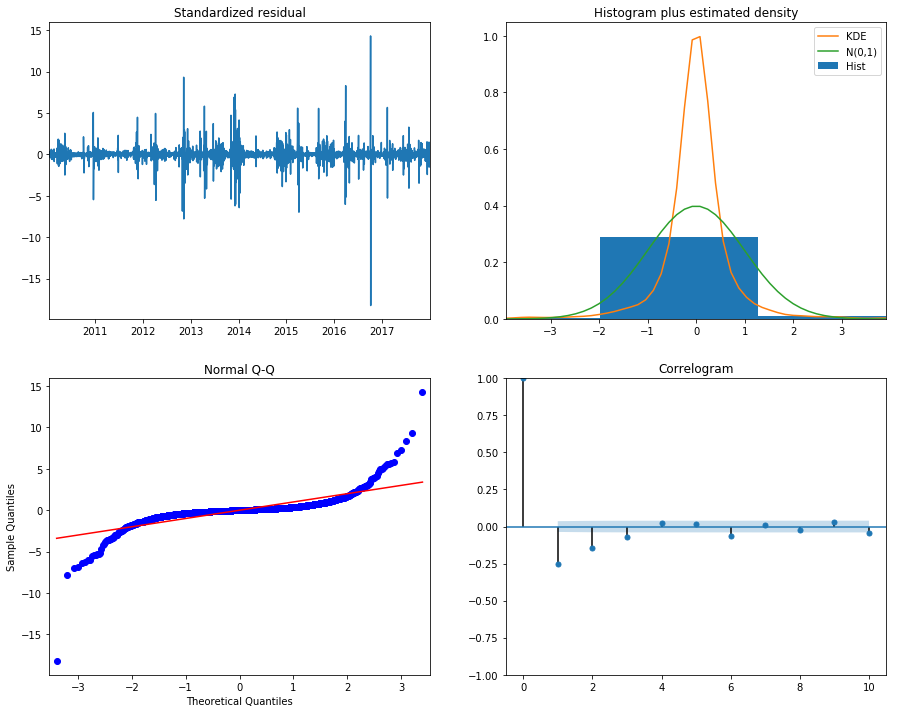

In [73]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

2555 to 2918


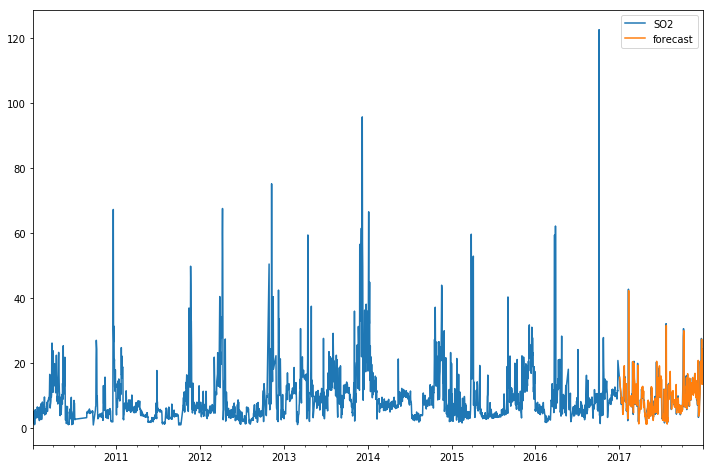

In [74]:
start = df.index.get_loc('2017-01-02')
end = df.index.get_loc('2017-12-31')
print(start,'to',end)
data['forecast'] = results.predict(start=start+1 ,end=end+1, dynamic= False)  
data[['SO2','forecast']].plot(figsize=(12, 8)) 
plt.savefig('ts_df_predict.png', bbox_inches='tight')

/home/ninjakx/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  


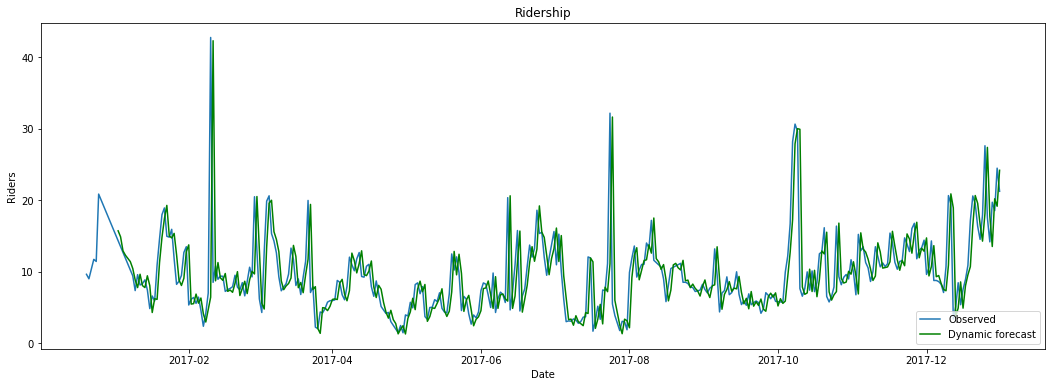

In [75]:
npredict =data.SO2['2017'].shape[0]
#print(npredict)
fig, ax = plt.subplots(figsize=(18,6))
npre = 12
ax.set(title='Ridership', xlabel='Date', ylabel='Riders')
ax.plot(df.index[-npredict-npre+1:], df.ix[-npredict-npre+1:, 'SO2'], '-', label='Observed')
ax.plot(df.index[-npredict-npre+1:], df.ix[-npredict-npre+1:, 'forecast'], 'g', label='Dynamic forecast')
legend = ax.legend(loc='lower right')
legend.get_frame().set_facecolor('w')
plt.savefig('ts_predict_compare.png', bbox_inches='tight')

In [92]:
predictions = results.predict(start=start+1, end=end+1)
#predictions


In [93]:
import numpy as np
dates = []
actual =[]
predicted = np.array(predictions, dtype=float)
#predicted = predicted[1:]
for i in range(start,end+1):
    dates.append(str(data.index[i]).split(' ')[0])
    actual.append(data['SO2'].iloc[i])
#print(len(predicted))
#print(len(actual))
df2 = pd.DataFrame({'Date':dates,'Predicted':predicted,'Actual':actual},columns=['Date','Predicted','Actual'])
df2
    
#print(arr)

,Date,Predicted,Actual
0,2017-01-02,15.716738,15.140000
1,2017-01-03,14.875322,14.322857
2,2017-01-04,12.902657,13.505714
3,2017-01-05,12.296708,12.688571
4,2017-01-06,11.848285,11.871429
5,2017-01-07,11.404422,11.054286
6,2017-01-08,10.453108,10.237143
7,2017-01-09,8.840794,9.420000
8,2017-01-10,7.767663,7.350000
9,2017-01-11,9.638885,9.580000


In [94]:
import pandas as pd 
times = pd.date_range('2018-01-01', periods=7, freq='1d')


In [95]:
future = pd.DataFrame(index=times, columns= data.columns)
df = pd.concat([data, future])


In [96]:
df

,Bar_Pressure,NO2,PM10,PM2.5,Solar Radiation(SR),SO2,Temp,Date,forecast
2010-01-04,650.28,3.26,48.95,82.51,610.44,1.74,10.65,2010-01-04,NaN
2010-01-05,648.86,5.30,57.12,82.51,610.44,1.99,10.74,2010-01-05,NaN
2010-01-06,645.97,10.39,113.11,82.51,610.44,4.18,11.21,2010-01-06,NaN
2010-01-07,646.22,8.55,124.22,82.51,610.44,5.20,10.78,2010-01-07,NaN
2010-01-08,647.40,4.23,66.37,82.51,610.44,2.66,9.04,2010-01-08,NaN
2010-01-09,648.90,1.21,51.65,82.51,610.44,1.42,10.55,2010-01-09,NaN
2010-01-10,647.32,2.29,53.37,82.51,610.44,1.14,7.64,2010-01-10,NaN
2010-01-11,647.28,2.26,58.41,82.51,610.44,1.37,7.85,2010-01-11,NaN
2010-01-12,646.94,8.62,105.51,82.51,610.44,1.60,8.29,2010-01-12,NaN
2010-01-13,647.35,10.17,137.98,82.51,610.44,5.72,10.03,2010-01-13,NaN


In [ ]:
start = 2500
end = 2789
print(start,end)

#predictions = results.predict(start=start, end=end)
#df['forecast(NEW)'] = results.predict(start = start, end = end, dynamic= True)  
print(results.predict(start = 2781, end = end, dynamic= True))
#print(df['forecast(NEW)'])
#df['forecast(NEW)'].ix[-24:].plot(figsize=(12, 8)) 
#plt.savefig('ts_predict_future.png', bbox_inches='tight')

In [ ]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy

 
def predict(coef, history):
	yhat = 0.0
	for i in range(1, len(coef)+1):
		yhat += coef[i-1] * history[-i]
	return yhat
 
def difference(dataset):
	diff = list()
	for i in range(1, len(dataset)):
		value = dataset[i] - dataset[i - 1]
		diff.append(value)
	return numpy.array(diff)
 
series = data['SO2']
X = series.values
size = len(X) - 100
#print(size)
#print(data.index[size])
#print(data.SO2[size])
#print("size:",size)
train, test = X[0:size], X[size:]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(1,1,1))
	model_fit = model.fit(trend='nc', disp=False)
	ar_coef, ma_coef = model_fit.arparams, model_fit.maparams
	resid = model_fit.resid
	diff = difference(history)
	yhat = history[-1] + predict(ar_coef, diff) + predict(ma_coef, resid)
	predictions.append(yhat)
	obs = test[t]
	#print('>predicted=%.3f, expected=%.3f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

In [ ]:
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]
forecast = model_fit.forecast()[0]
# invert the differenced forecast to something usable
forecast = inverse_difference(X, forecast, size)
print('Forecast: %f' % forecast)

In [ ]:
data['SO2'][2408]

In [ ]:
from pandas import Series
from statsmodels.tsa.arima_model import ARIMA
import numpy
 
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return numpy.array(diff)
 
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]
 
# load dataset
series = data['SO2']
# seasonal difference
X = series.values
days_in_year = 365
differenced = difference(X, days_in_year)
# fit model
model = ARIMA(differenced, order=(1,1,1))
model_fit = model.fit(disp=0)
# multi-step out-of-sample forecast
forecast = model_fit.forecast(steps=7)[0]
# invert the differenced forecast to something usable
history = [x for x in X]
day = 1
for yhat in forecast:
	inverted = inverse_difference(history, yhat, days_in_year)
	print('Day %d: %f' % (day, inverted))
	history.append(inverted)
	day += 1

In [ ]:
data.rename(columns={'Nitrogen Dioxide(NO2)': 'NO2', 'Bar Pressure(Bar Pressure)': 'Bar_Pressure','PM 10(RSPM)': 'PM10','Temperature(TEMP)': 'Temp','Sulfur Dioxide(SO2)': 'SO2','PM 2.5(PM2.5)':'PM2.5','Solar_Radiation(SR)':'Solar_Radiation'}, inplace=True)
#data

In [ ]:
data = pd.DataFrame(data) 

In [ ]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
import numpy
 
# create a difference transform of the dataset
def difference(dataset):
	diff = list()
	for i in range(1, len(dataset)):
		value = dataset[i] - dataset[i - 1]
		diff.append(value)
	return numpy.array(diff)
 
# Make a prediction give regression coefficients and lag obs
def predict(coef, history):
	yhat = coef[0]
	for i in range(1, len(coef)):
		yhat += coef[i] * history[-i]
	return yhat
 
series = data['SO2']
# split dataset
X = difference(series.values)
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:]
# train autoregression


model = AR(train)
model_fit = model.fit(maxlag=6, disp=False)
window = model_fit.k_ar
coef = model_fit.params
# walk forward over time steps in test
history = [train[i] for i in range(len(train))]
predictions = list()
for t in range(len(test)):
	yhat = predict(coef, history)
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)
	print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [ ]:
# fit an AR model and save the whole model to file
from pandas import Series
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.ar_model import ARResults
import numpy
 
# create a difference transform of the dataset
def difference(dataset):
	diff = list()
	for i in range(1, len(dataset)):
		value = dataset[i] - dataset[i - 1]
		diff.append(value)
	return numpy.array(diff)
 
# load dataset
series = data['SO2']
X = difference(series.values)
# fit model
model = AR(X)
model_fit = model.fit(maxlag=6, disp=False)
# save model to file
model_fit.save('ar_model.pkl')
# save the differenced dataset
numpy.save('ar_data.npy', X)
# save the last ob
numpy.save('ar_obs.npy', [series.values[-1]])

In [ ]:
# load the AR model from file
from statsmodels.tsa.ar_model import ARResults
import numpy
loaded = ARResults.load('ar_model.pkl')
print(loaded.params)
data = numpy.load('ar_data.npy')
last_ob = numpy.load('ar_obs.npy')
print(last_ob)

# load the AR model from file
from statsmodels.tsa.ar_model import ARResults
import numpy
loaded = ARResults.load('ar_model.pkl')
print(loaded.params)
data = numpy.load('ar_data.npy')
last_ob = numpy.load('ar_obs.npy')
print(last_ob)

In [ ]:
data['Sampling Date'].head

In [ ]:
data['Sampling Date'] = pd.to_datetime(data['Sampling Date'],format = '%d-%m-%y')


In [ ]:
data.index = data['Sampling Date']
del data['Sampling Date']
data.describe()

In [ ]:
#data['PM 2.5'].fillna((data['PM 2.5'].mean()), inplace=True)
area1 = data.loc[data['Location of Monitoring Station'] == 'Nizamuddin, Delhi']
data1 = area1["NO2"]
data1.plot(figsize=(16,5)) 
plt.title("Nizamuddin, Delhi")
plt.ylabel("ug/m3")

plt.show()


In [ ]:
# The 'MS' string groups the data in buckets by start of the month
data = data1.resample('MS').mean()

# The term bfill means that we use the value before filling in missing values
data = data.fillna(data.bfill())

In [ ]:
# fit an AR model and manually save coefficients to file
from pandas import Series
from statsmodels.tsa.ar_model import AR
import numpy
 
# create a difference transform of the dataset
def difference(dataset):
	diff = list()
	for i in range(1, len(dataset)):
		value = dataset[i] - dataset[i - 1]
		diff.append(value)
	return numpy.array(diff)
 
# load dataset
series = data1
X = difference(series.values)
# fit model
window_size = 6
model = AR(X)
model_fit = model.fit(maxlag=window_size, disp=False)
# save coefficients
coef = model_fit.params
numpy.save('man_model.npy', coef)
# save lag
lag = X[-window_size:]
numpy.save('man_data.npy', lag)
# save the last ob
numpy.save('man_obs.npy', [series.values[-1]])

In [ ]:
# load the manually saved model from file
import numpy
coef = numpy.load('man_model.npy')
print(coef)
lag = numpy.load('man_data.npy')
print(lag)
last_ob = numpy.load('man_obs.npy')
print(last_ob)

In [ ]:
# load AR model from file and make a one-step prediction
from statsmodels.tsa.ar_model import ARResults
import numpy
# load model
model = ARResults.load('ar_model.pkl')
data = numpy.load('ar_data.npy')
last_ob = numpy.load('ar_obs.npy')
# make prediction
predictions = model.predict(start=len(data)-100, end=len(data))
# transform prediction
yhat = predictions[0] + last_ob[0]
print(len(data)-100,'to',len(data))
print('Prediction: %f' % yhat)

In [ ]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy

 
def predict(coef, history):
	yhat = 0.0
	for i in range(1, len(coef)+1):
		yhat += coef[i-1] * history[-i]
	return yhat
 
def difference(dataset):
	diff = list()
	for i in range(1, len(dataset)):
		value = dataset[i] - dataset[i - 1]
		diff.append(value)
	return numpy.array(diff)
 
series = data['SO2']
X = series.values
size = len(X) - 100
#print(size)
print(data.index[size])
print(data.SO2[size])
print("size:",size)
train, test = X[0:size], X[size:]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(1,1,1))
	model_fit = model.fit(trend='nc', disp=False)
	ar_coef, ma_coef = model_fit.arparams, model_fit.maparams
	resid = model_fit.resid
	diff = difference(history)
	yhat = history[-1] + predict(ar_coef, diff) + predict(ma_coef, resid)
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('>predicted=%.3f, expected=%.3f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

In [ ]:
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]
forecast = model_fit.forecast()[0]
# invert the differenced forecast to something usable
forecast = inverse_difference(X, forecast, size)
print('Forecast: %f' % forecast)

In [ ]:
from pandas import Series
from statsmodels.tsa.arima_model import ARIMA
import numpy

forecast = model_fit.forecast(steps=7)[0]
# invert the differenced forecast to something usable
history = [x for x in X]
day = 1
for yhat in forecast:
	inverted = inverse_difference(history, yhat, days_in_year)
	print('Day %d: %f' % (day, inverted))
	history.append(inverted)
	day += 1

In [ ]:
forecast = model_fit.forecast(steps=7)[0]
forecast = inverse_difference(X, forecast, size)
print('Forecast: %f' % forecast)

In [ ]:
from pandas import datetime
start = len(data)-100
end = len(data)
forecast = model_fit.predict(start=start, end=end)
#forecast = inverse_difference(X, forecast, size)


In [ ]:
for yhat in forecast:
	inverted = inverse_difference(history, yhat, len(data))
	print('Day %d: %f' % (start, inverted))
	history.append(inverted)
	start+=1

print(forecast)

In [ ]:
for i in range(start,end+1):
    #print(forecast[i-(len(data)+1)])
    #print(str(data.index[i-(len(data)+1)]).split(' ')[0])
    
    #print('Forecast: {}'.format(forecast[i-(len(data)+1)]))

In [ ]:
area1 = data.loc[data['Location of Monitoring Station'] == 'Nizamuddin, Delhi']

In [ ]:
area1 = data1
area1.head

In [ ]:
y = area1
# The 'MS' string groups the data in buckets by start of the month
#y = y['PM 10(RSPM)'].resample('MS').mean()

# The term bfill means that we use the value before filling in missing values
y = y.fillna(y.bfill())

print(y)

In [ ]:
ts = area1
ts.head(10)


In [ ]:
plt.plot(ts)

In [ ]:
area2 = data.loc[data['Location of Monitoring Station'] == 'Pritampura, Delhi']

In [ ]:
ts2 = area2['RSPM/PM10'] 
plt.plot(ts2)

In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [ ]:
test_stationarity(ts)

In [ ]:
ts_log = np.log(ts)
moving_avg = pd.rolling_mean(ts_log,12)
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [ ]:
import tweepy
import pandas as pd
import csv
import re
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import collections
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
import re, string
import nltk
from nltk.collocations import *
from nltk.stem.wordnet import WordNetLemmatizer
import string
from gensim.models import Word2Vec
from textblob import TextBlob
from gensim import corpora, models
import string



In [ ]:
words_list = []
stop = stopwords
#stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized
texts = [["places","eat"],["places","visit"]]
doc_clean = [clean(doc).split() for doc in texts]
dictionary = corpora.Dictionary(doc_clean)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
ldamodel = models.ldamodel.LdaModel(doc_term_matrix, num_topics=6, id2word = 
dictionary, passes=5)
for topic in ldamodel.show_topics(num_topics=6, formatted=False, num_words=15):
    for (w,val) in topic[1]:
        words_list.append(w)
    
    #print(list(w for (w, val) in topic[1]))
    print("Topic {}: Words: ".format(topic[0]))
    topicwords = [w for (w, val) in topic[1]]
    print(topicwords)
#print(words_list)

In [ ]:
Total - Employment income
Without employment income
With employment income
Percentage with employment income
Under $5,000 (including loss)
$5,000 to $9,999
$10,000 to $19,999
$20,000 to $29,999
$30,000 to $39,999
$40,000 to $49,999
$50,000 to $59,999
$60,000 to $69,999
$70,000 to $79,999
$80,000 to $89,999
$90,000 to $99,999
$100,000 and over
Median employment income ($)Footnote 2
Average employment income ($)Footnote 3

In [ ]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
source_code = requests.get('http://eoddata.com/stockquote/NASDAQ/GOOG.htm').text
soup = BeautifulSoup(source_code, "lxml")

table = soup.find_all('table')[7]

df = (pd.read_html(str(table)))[0]
print(df)
#df = pd.DataFrame(df)
#print(df.head(2))



In [ ]:
df.columns = df.iloc[0]
df = df[1:] 
df

In [ ]:
print(df.iloc[1])

In [ ]:
df['Date'][1]

In [ ]:
import numpy as np
import pandas as pd  
import urllib.request
from bs4 import BeautifulSoup

url = "http://www12.statcan.gc.ca/census-recensement/2016/dp-pd/dt-td/Rp-eng.cfm?TABID=2&LANG=E&A=R&APATH=3&DETAIL=0&DIM=0&FL=A&FREE=0&GC=01&GL=-1&GID=1341679&GK=1&GRP=1&O=D&PID=110719&PRID=10&PTYPE=109445&S=0&SHOWALL=0&SUB=0&Temporal=2017&THEME=125&VID=0&VNAMEE=&VNAMEF=&D1=0&D2=0&D3=0&D4=0&D5=0&D6=0"
res = urllib.request.urlopen(url)

html = res.read()

## parse with BeautifulSoup
bs = BeautifulSoup(html, "html.parser")

tables = bs.find_all("table")

    
df = (pd.read_html(str(tables)))[0]
print(df)



In [ ]:
table = tables[0]
lab = []
labels = table.findAll('th',{'headers':'col-0'})
for label in labels:

    data = str(label.text).strip()
    data = str(data).split("($)Footnote", 1)[0]

    lab.append(data)

In [ ]:
lab1=[]
import codecs
for i in lab:
    #i = i.encode('utf-8')
    lab1.append(i.encode().decode())
    print(i.encode().decode())
    

In [ ]:
columns = ['Employment income groups (18)','Total - Main mode of commuting','Car, truck or van','Driver, alone',
          '2 or more persons shared the ride to work','Driver, with 1 or more passengers',
         'Passenger, 2 or more persons in the vehicle','Sustainable transportation',
         'Public transit','Active transport','Other method']
df.columns = columns
df

In [ ]:
df['Employment income groups (18)']=lab1
df

In [ ]:
df

In [ ]:
df.index = df['Employment income groups (18)']
del df['Employment income groups (18)']

In [ ]:
df

In [ ]:
df_to_

In [ ]:
df.index['$10,000 to $19,999']

In [ ]:
for i in lab:
    print('{}'.format(i))

In [ ]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
source_code = requests.get('http://eoddata.com/stockquote/NASDAQ/GOOG.htm').text
soup = BeautifulSoup(source_code, "lxml")

table = soup.find_all('table')[7]

df = (pd.read_html(str(table)))[0]
df.columns = df.iloc[0]
df = df[1:] 

In [ ]:
df.to_csv('file.csv', sep=';',index=False)


In [ ]:
df_data = pd.read_csv('file.csv', sep=';')
df_data

In [ ]:
dic = pd.Series.from_csv('file.csv').to_dict()
dic